In [8]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

Generate some sample data

In [9]:
x = np.arange(0,11).reshape(11,1)
x

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [199]:
beta =0.6*np.identity(11) #define our beta and alpha
alpha =0.8*np.identity(11)
t = x + np.random.normal(0,0.6,(11,1)) #generate our noise corrupted outputs from the line t= x + error
t

array([[  0.41734039],
       [  1.9422321 ],
       [  1.80563482],
       [  3.0749056 ],
       [  3.49462667],
       [  5.64502024],
       [  6.99451392],
       [  6.66021358],
       [  7.79657849],
       [  8.96996508],
       [ 10.60043757]])

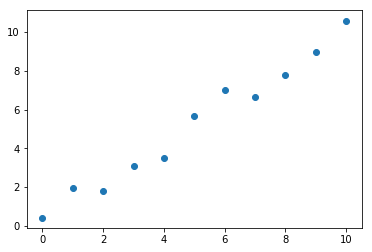

In [200]:
plt.scatter(x,t) #just to visualise

In [201]:
#define the matrix of basis functions
#In this case a 10 order polynomial
phi = np.concatenate([x**0,x,x**2, x**3, x**4,x**5,x**6,x**7,x**8,x**9,x**10], axis=1)
phi

array([[          1,           0,           0,           0,           0,
                  0,           0,           0,           0,           0,
                  0],
       [          1,           1,           1,           1,           1,
                  1,           1,           1,           1,           1,
                  1],
       [          1,           2,           4,           8,          16,
                 32,          64,         128,         256,         512,
               1024],
       [          1,           3,           9,          27,          81,
                243,         729,        2187,        6561,       19683,
              59049],
       [          1,           4,          16,          64,         256,
               1024,        4096,       16384,       65536,      262144,
            1048576],
       [          1,           5,          25,         125,         625,
               3125,       15625,       78125,      390625,     1953125,
            97

The Map estimate is given by:
$W_{MAP} = \beta (\alpha I + \beta \Phi^{T}\Phi)^{-1} \Phi^{T} t$

In [202]:
#A near optimal alpha
w= beta.dot(np.linalg.inv(alpha+beta.dot(phi.T.dot(phi))).dot(phi.T).dot(t))
#below optimal
wb= beta.dot(np.linalg.inv(alpha*0+beta.dot(phi.T.dot(phi))).dot(phi.T).dot(t))
#above optimal
wa= beta.dot(np.linalg.inv(alpha*1e3+beta.dot(phi.T.dot(phi))).dot(phi.T).dot(t))

In [203]:
w

array([[  4.77673472e-01],
       [  4.39895488e-01],
       [  2.73153251e-01],
       [  2.62215084e-02],
       [ -1.14128639e-01],
       [  5.10285715e-02],
       [ -9.45931995e-03],
       [  7.94625109e-04],
       [ -2.49632869e-05],
       [ -2.91973058e-14],
       [ -6.66261210e-16]])

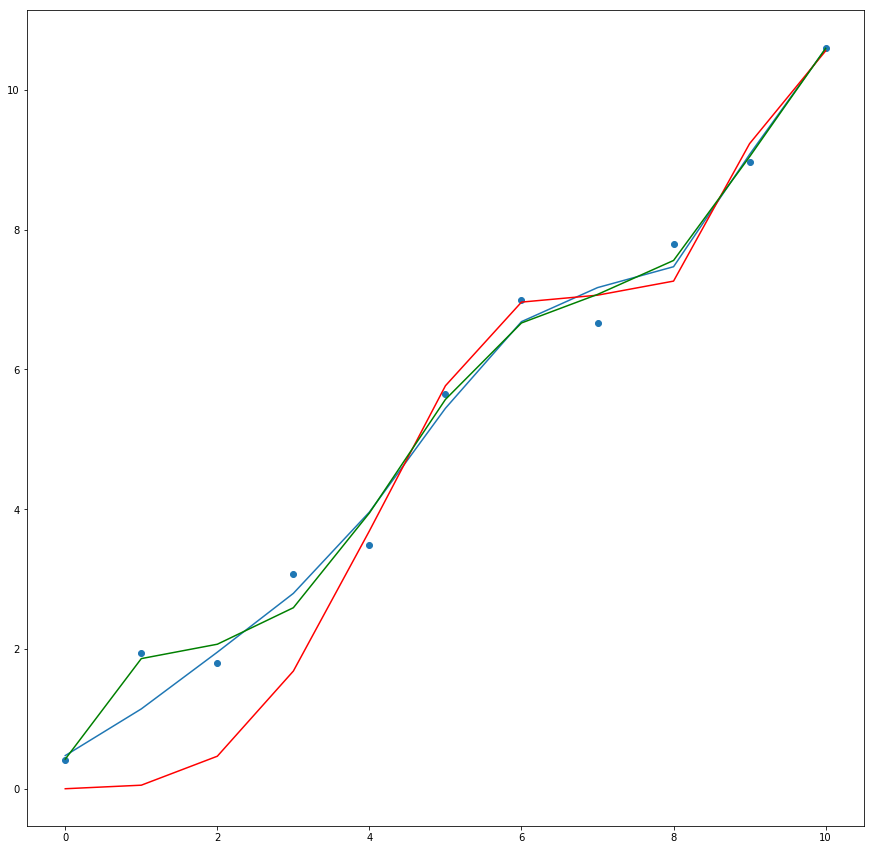

In [205]:
plt.figure(figsize=(15,15))
plt.scatter(x,t)
plt.plot(x,phi.dot(w)) #Tries to trade off fitting data points with generalising - close to true function
plt.plot(x,phi.dot(wa), c='r') #Doesn't try to fit the data much at all
plt.plot(x,phi.dot(wb), c='g')# Tries to overfit the data.